# Handling categorical missing values

### Import required libraries

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as mn

%matplotlib inline

### load dataset

In [86]:
data = pd.read_csv('House Price.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Check missing values

In [87]:
pd.set_option('display.max_rows',100)
data.isnull().sum().sort_values()

Id                  0
TotalBsmtSF         0
Heating             0
SaleCondition       0
CentralAir          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
SaleType            0
YrSold              0
MoSold              0
MiscVal             0
PoolArea            0
ScreenPorch         0
BsmtUnfSF           0
3SsnPorch           0
OpenPorchSF         0
WoodDeckSF          0
PavedDrive          0
GarageArea          0
GarageCars          0
Fireplaces          0
EnclosedPorch       0
BsmtFinSF2          0
HeatingQC           0
SalePrice           0
LandSlope           0
LandContour         0
LotShape            0
Neighborhood        0
Condition1          0
Street              0
LotArea             0
MSZoning            0
BsmtFinSF1          0
Condition2

## 1. Frequent Category Imputation 

- Find missing values percentage
- Check missing values percentage is less than 20% 
- Then replace missing values with most frequent category / Mode

In [88]:
pd.set_option('display.max_rows',100)
data.isnull().mean().sort_values()

Id               0.000000
TotalBsmtSF      0.000000
Heating          0.000000
SaleCondition    0.000000
CentralAir       0.000000
1stFlrSF         0.000000
2ndFlrSF         0.000000
LowQualFinSF     0.000000
GrLivArea        0.000000
BsmtFullBath     0.000000
BsmtHalfBath     0.000000
FullBath         0.000000
HalfBath         0.000000
BedroomAbvGr     0.000000
KitchenAbvGr     0.000000
KitchenQual      0.000000
TotRmsAbvGrd     0.000000
Functional       0.000000
SaleType         0.000000
YrSold           0.000000
MoSold           0.000000
MiscVal          0.000000
PoolArea         0.000000
ScreenPorch      0.000000
BsmtUnfSF        0.000000
3SsnPorch        0.000000
OpenPorchSF      0.000000
WoodDeckSF       0.000000
PavedDrive       0.000000
GarageArea       0.000000
GarageCars       0.000000
Fireplaces       0.000000
EnclosedPorch    0.000000
BsmtFinSF2       0.000000
HeatingQC        0.000000
SalePrice        0.000000
LandSlope        0.000000
LandContour      0.000000
LotShape    

<AxesSubplot:>

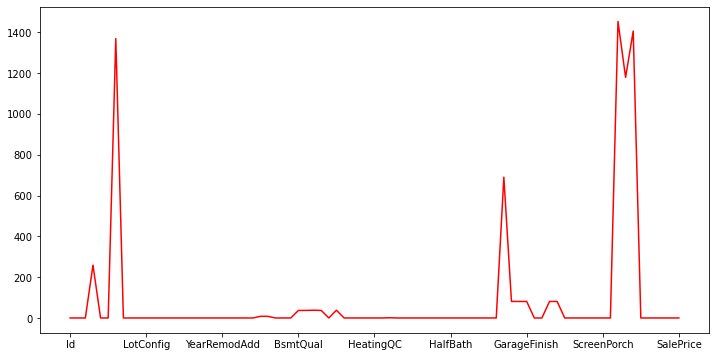

In [89]:
plt.figure(figsize=(12,6))
data.isnull().sum().plot(color='r')

In [90]:
for col in data.columns:
    if data[col].isnull().mean()<=0.20:
        data[col].fillna(data[col].mode()[0],inplace=True)
        

<AxesSubplot:>

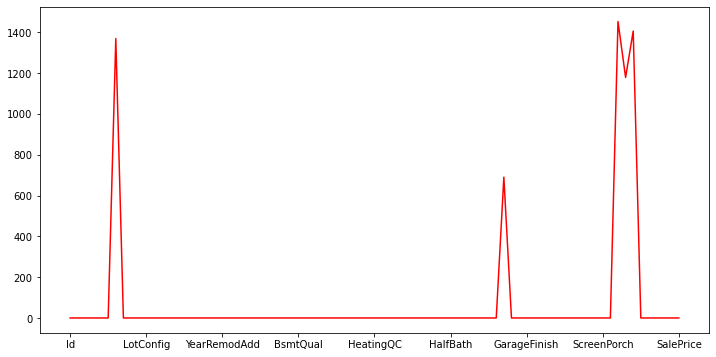

In [91]:
plt.figure(figsize=(12,6))
data.isnull().sum().plot(color='r')

## Find feature which is having more than 20% NaN values

In [92]:
features = []
for feature in data.columns:
    if data[feature].isnull().mean() > 0.20:
        features.append(feature)

In [93]:
for i in features:
    print(('{} having     {}% null values').format(i,data[i].isnull().mean()))

Alley having     0.9376712328767123% null values
FireplaceQu having     0.4726027397260274% null values
PoolQC having     0.9952054794520548% null values
Fence having     0.8075342465753425% null values
MiscFeature having     0.963013698630137% null values


## 2. Capture NaN with New variable

- Replace NaN with 'Missing'

In [94]:
for col in features:
    data[col].fillna('Missing',inplace=True)

In [95]:
for i in features:
    print(('{} having     {}% null values').format(i,data[i].isnull().mean()))

Alley having     0.0% null values
FireplaceQu having     0.0% null values
PoolQC having     0.0% null values
Fence having     0.0% null values
MiscFeature having     0.0% null values


<AxesSubplot:>

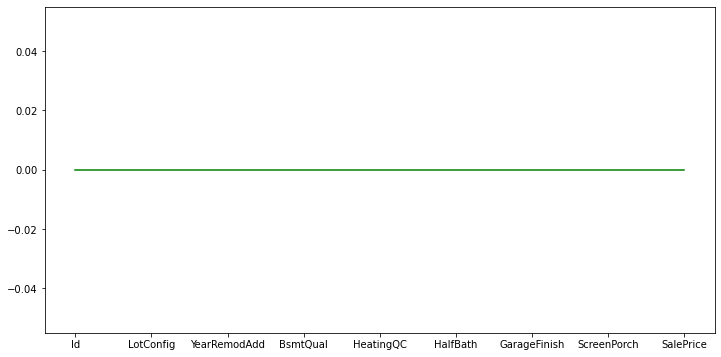

In [96]:
plt.figure(figsize=(12,6))
data.isnull().sum().plot(color='g')

<AxesSubplot:>

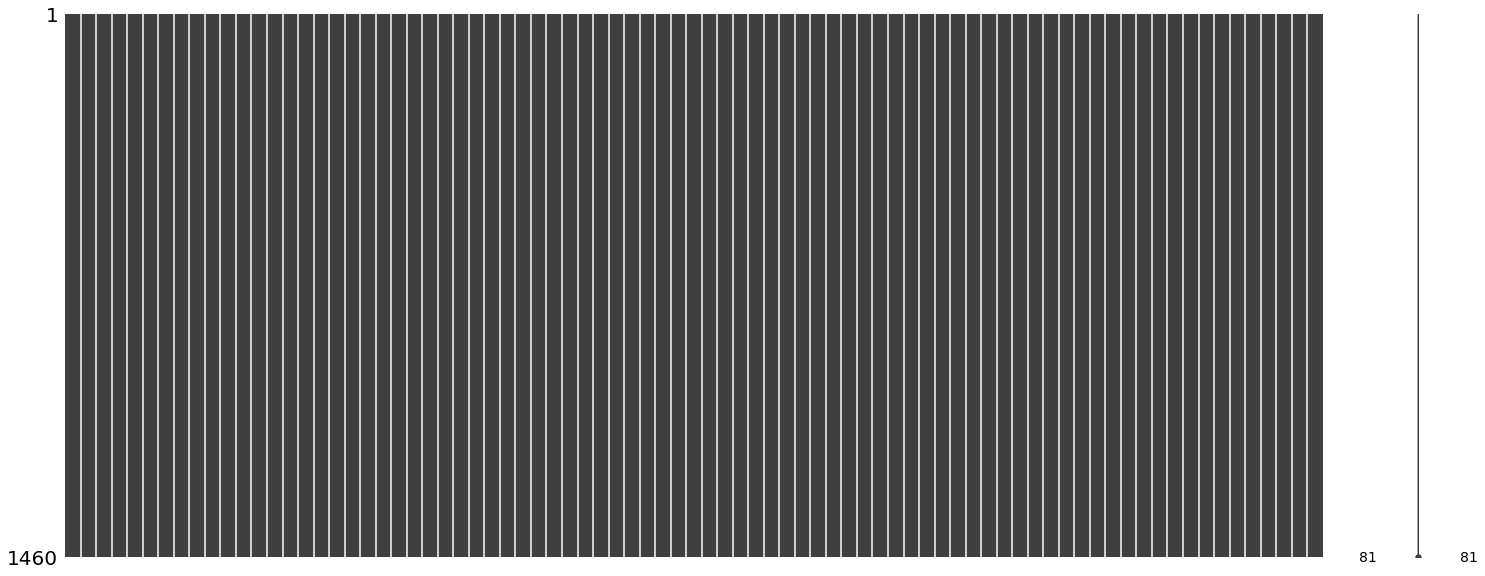

In [97]:
mn.matrix(data)

## 3. Capturing NaN with new feature
- replace NaN with 1 else 0

In [126]:
data = pd.read_csv('House Price.csv',usecols=features)

In [127]:
data.head()

,Alley,FireplaceQu,PoolQC,Fence,MiscFeature
0,NaN,NaN,NaN,NaN,NaN
1,NaN,TA,NaN,NaN,NaN
2,NaN,TA,NaN,NaN,NaN
3,NaN,Gd,NaN,NaN,NaN
4,NaN,TA,NaN,NaN,NaN


In [128]:
dat=[]
for col in data.columns:
    data[col+'_New']=np.where(data[col].isnull(),1,0)
    dat.append(col+'_New')

In [129]:
dat

['Alley_New', 'FireplaceQu_New', 'PoolQC_New', 'Fence_New', 'MiscFeature_New']

In [130]:
data.head()

,Alley,FireplaceQu,PoolQC,Fence,MiscFeature,Alley_New,FireplaceQu_New,PoolQC_New,Fence_New,MiscFeature_New
0,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1
1,NaN,TA,NaN,NaN,NaN,1,0,1,1,1
2,NaN,TA,NaN,NaN,NaN,1,0,1,1,1
3,NaN,Gd,NaN,NaN,NaN,1,0,1,1,1
4,NaN,TA,NaN,NaN,NaN,1,0,1,1,1


<AxesSubplot:>

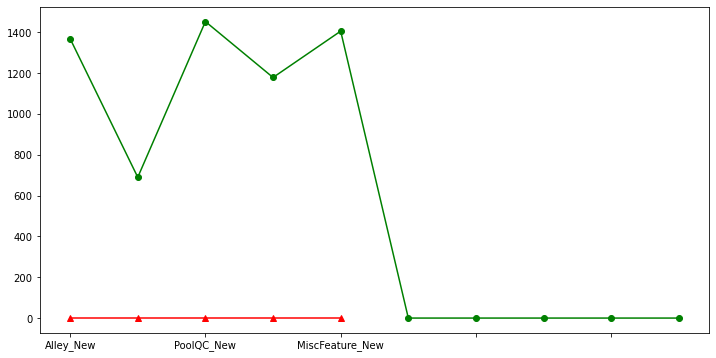

In [132]:
plt.figure(figsize=(12,6))
data.isnull().sum().plot(color='g',marker='o')
data[dat].isnull().sum().plot(color='r',marker='^')